# Logistics Regression

This regression help us to predict the categorical values. such as if the customer decide to buy it or not / yes or no.

### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Load Data

In [3]:
raw_data = pd.read_csv("C:/Users/ASUS/Desktop/Data Science/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L235/2.01. Admittance.csv")

In [4]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Variable

In [6]:
y = data['Admitted']
x1 = data['SAT']

## Regression Part

### Regression


In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x) # use Logit function here
results_log = reg_log.fit() # function value is the value of objective functions at 10th
# this function show when the ML stop learning. For statsmodel max iteration is 35 than it stop learning
results_log.summary()


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.7992
Time:                        20:05:10   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Regression Line

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20812\1381183515.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = x1 * results_lin.params[1] + results_lin.params[0]


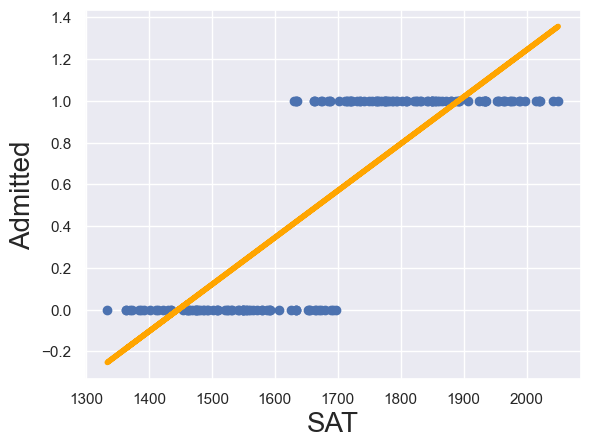

In [8]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y)
yhat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1, yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with Logistics Regression

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20812\2069168115.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


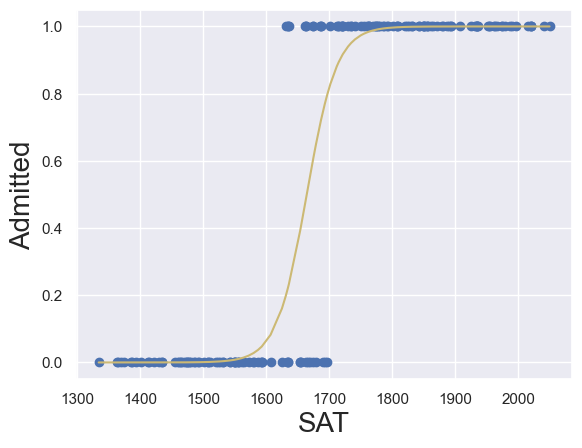

In [9]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + b1*x) / (1 + np.exp(b0 + b1*x)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show()

In [12]:
results_log.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:               7.410e-11
Time:                        20:06:04   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

### Maximum Likelihood Estimation
* Estimates how model describes the underlying relationship of the variables
* The bigger the likelihood function, the highe the probability that the model correct.
* Tries to maximize the likelihood (computer finds the highest likelihood to become the model)


### Log Likelihood
* almost always -ve. 
* the bigger log likelihodd the better

In [13]:
x0 = np.ones(168) # Not that the LL null is the same as the above
reg_log = sm.Logit(y,x0) # we can compare previous results with this to explain the model
results_log = reg_log.fit()
results_log.summary() # similar to f-stats in linear regression, we can test the significant by checking LL ratio p-value


Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:               7.410e-11
Time:                        20:06:04   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

### Pseudo R-squared
unlike linear regression, there is no clear R-squared define for logistics sometime they use;

1. AIC
2. BIC
3. McFadden R-squared - This is what this model used

* Used to compare variation of the same model
* 'A good Pseudo R-Squared is somewhere between 0.2 to 0.4'
* Different models will have different and **incomparable** Psedo R-Squares

Formula for LOGIT regression for this 

$ log(pi/(1-pi)) = 69.91+0.042*SAT $
